# 2. Consumption object
The `consumption` object is one of the core objects in pySIMDEUM. By default, a `consumption` profile is simulated when generating a `House`. Effectively, it is a representation of the water consumption for a household.

## `Consumption` data structure

The `xarray.DataArray` structure of `consumption` is a multidimensional array to handle the labelled flow data. The core of the DataArray is the numerical data of consumption flow rates in litres per second.

Dimensions define the axes of the data, and are:

* `time`:  temporal resolution of the data
* `enduse`: appliances that are sampled to populated this household
* `user`: individual household members
* `patterns`: represents different consumption patterns / scenarios

The coordinates are effectively the axes labels. For example, `time` will be populated with timestamps. `enduse` will be specific appliances such as `shower`, `wc` etc.

In [1]:
import pysimdeum
import matplotlib.pyplot as plt

Initialise a two-person household

In [2]:
# Build a house (two-person household)
house = pysimdeum.built_house(house_type='two_person')

The `consumption` profile is simulated when generating a `House` and can be accessed directly from the `House` instance.

In [3]:
house.consumption

<xarray.DataArray (time: 86401, user: 3, enduse: 8, patterns: 1, flowtypes: 2)> Size: 33MB
array([[[[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],
...
         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]],


        [[[0., 0.]],

         [[0., 0.]],

         [[0., 0.]],

         ...,

         [[0., 0.]],

         [[0., 0.]],

         [[0., 0.]]]]])
Coordinates:
  * time       (time) datetime64[ns] 691kB 2025-04-25 ... 2025-04-26
  * user       (user) <U9 108B 'user_1' 'user_2' 'household'
  * enduse     (enduse) <U14 448B 'Wc' 'Bathtub' ... 'Shower' 'WashingMachine'
  * patterns   (patterns) int64 8B 0
  * flowtypes  (flowtypes) <U9 72B 'totalflow' 'hotflow'

You can access the dimensions and coordinates of the `consumption` DataArray.

In [4]:
print(house.consumption.dims)

('time', 'user', 'enduse', 'patterns', 'flowtypes')


In [5]:
print(house.consumption.coords)

Coordinates:
  * time       (time) datetime64[ns] 691kB 2025-04-25 ... 2025-04-26
  * user       (user) <U9 108B 'user_1' 'user_2' 'household'
  * enduse     (enduse) <U14 448B 'Wc' 'Bathtub' ... 'Shower' 'WashingMachine'
  * patterns   (patterns) int64 8B 0
  * flowtypes  (flowtypes) <U9 72B 'totalflow' 'hotflow'


The `consumption` contains two `flowtypes` labels of `totalflow` and `hotflow`. `hotflow` is a fractional representation of the `totalflow` based on the ratio of the enduse temperature to the globally defined cold and hot water temperatures. See documentation for more information.

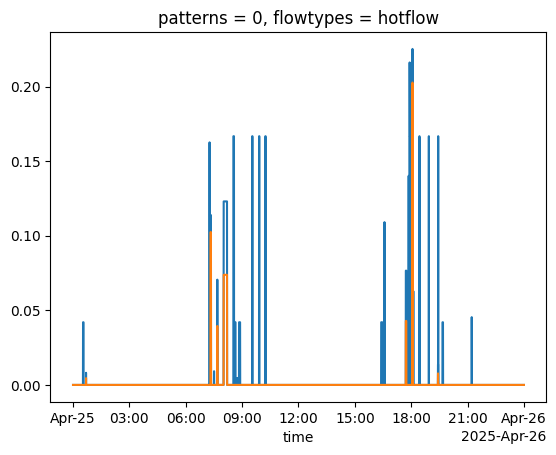

In [6]:
house.consumption.sum(["enduse","user"]).sel(flowtypes="totalflow").plot()
house.consumption.sum(["enduse","user"]).sel(flowtypes="hotflow").plot()
plt.show()

You can access the consumption water profile for specific enduses. Enduse consumption patterns are generated in slightly differing way to represent the actual function of the appliance. See documentation for detailed explanations.

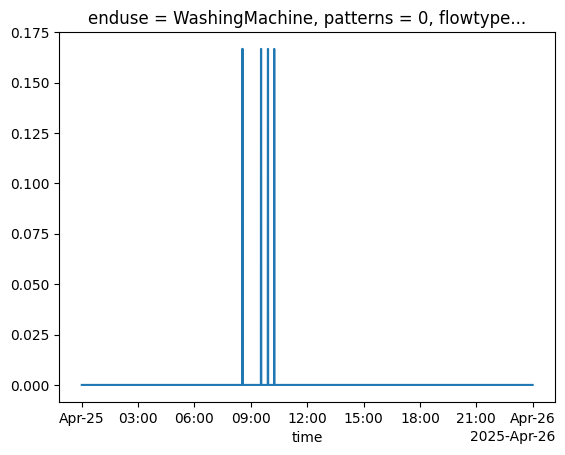

In [7]:
house.consumption.sum(["user"]).sel(enduse="WashingMachine").sel(flowtypes="totalflow").plot()